<a href="https://colab.research.google.com/github/sdeepak09/CS771A_Project/blob/master/Funinest_Covid_19_detection_using_chest_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Clone the entire repo.
!git clone -l -s https://github.com/ieee8023/covid-chestxray-dataset.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 474, done.
remote: Counting objects: 100% (474/474), done.
remote: Compressing objects: 100% (417/417), done.
remote: Total 2758 (delta 110), reused 379 (delta 50), pack-reused 2284
Receiving objects: 100% (2758/2758), 522.28 MiB | 37.25 MiB/s, done.
Resolving deltas: 100% (1086/1086), done.
Checking out files: 100% (769/769), done.
/content/cloned-repo
annotations  images	   README.md	     SCHEMA.md	tests
docs	     metadata.csv  requirements.txt  scripts	volumes


In [0]:
# !ls /content/cloned-repo/images/

In [0]:
import os
len(os.listdir(os.getcwd() + "/images/"))

539

In [0]:
import pandas as pd
meta_data = pd.read_csv(os.getcwd() + "/metadata.csv")

In [0]:
meta_data.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [0]:
meta_data.filename.head()

0    auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1    auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2    auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3    auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4                                nejmc2001573_f1a.jpeg
Name: filename, dtype: object

In [0]:
meta_data.filename[1]

'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'

In [0]:
meta_data[meta_data.filename=="851007d4.jpg"]

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes


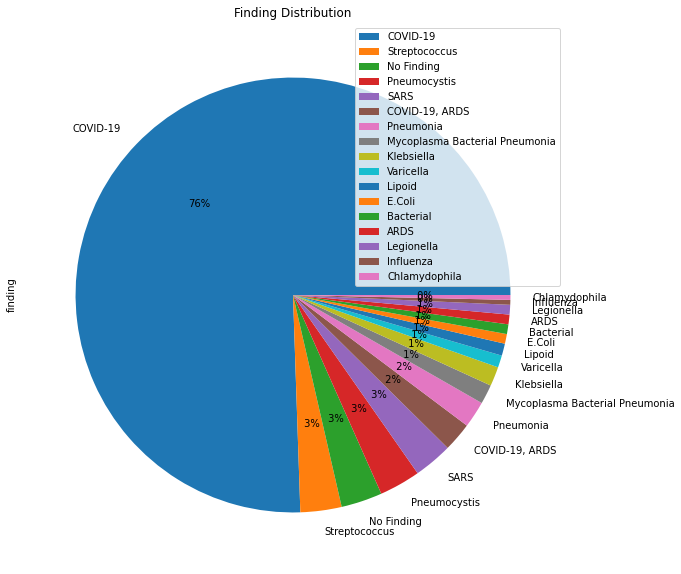

In [0]:
ax = meta_data['finding'].value_counts(dropna=False).plot.pie(y='Finding', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Finding Distribution')

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deep11054","key":"a96ca60e185c852ad4ed720c5408e1aa"}'}

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-01 21:47:16          71785  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10483  
stefanlarson/outofscope-intent-classification-dataset         Out-of-Scope Intent Classification Dataset          285KB  2020-05-15 03:04:34              1  
ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney      TV shows on Netflix, Prime Video, Hulu and Disney+   88KB  2020-05-25 15:38:39             12  
ruchi798/movies-on-netflix-prime-video-hulu-and-disn

In [0]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


100% 2.28G/2.29G [00:29<00:00, 88.5MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.9MB/s]


In [0]:
!ls

annotations		  images	README.md	  scripts
chest-xray-pneumonia.zip  kaggle.json	requirements.txt  tests
docs			  metadata.csv	SCHEMA.md	  volumes


In [0]:
! mkdir train

In [0]:
! unzip chest-xray-pneumonia.zip -d train

In [0]:
!ls /content/cloned-repo/train/chest_xray/test/NORMAL

We have to create 2 directories where we have to put Events and Non-Events Images
- Import required Packages
- Create Directories for Events and Non-Events

In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [0]:
!ls /content/cloned-repo/train/chest_xray/train

NORMAL	PNEUMONIA


In [0]:
len(os.listdir("/content/cloned-repo/train/chest_xray/train/NORMAL/"))

1341

In [0]:
len(os.listdir("/content/cloned-repo/train/chest_xray/test/NORMAL/"))

234

Create Directory for training and test Split

In [0]:
try:
    # os.mkdir('/content/cloned-repo/Covid_19') #If you are running for the first time then uncomment this line
    os.mkdir('/content/cloned-repo/Covid_19/training')
    os.mkdir('/content/cloned-repo/Covid_19/testing')
    os.mkdir('/content/cloned-repo/Covid_19/training/covid')
    os.mkdir('/content/cloned-repo/Covid_19/training/non_covid')
    os.mkdir('/content/cloned-repo/Covid_19/testing/covid')
    os.mkdir('/content/cloned-repo/Covid_19/testing/non_covid')
except OSError:
    pass

In [0]:
!ls /content/cloned-repo/Covid_19/training

covid  non_covid


Create Directory for Covid and Non_Covid Images we have data from different sources so we have to get all that in a directory for covid and non-covid cases

---



In [0]:
try:
    os.mkdir('/content/cloned-repo/Covid_19/images_parent_dir')
    os.mkdir('/content/cloned-repo/Covid_19/images_parent_dir/covid')
    os.mkdir('/content/cloned-repo/Covid_19/images_parent_dir/non_covid')
except OSError:
    pass

Copy all the images from Pneumonia Normal cases (From train as well as test) to non_covid dir created above

In [0]:
SOURCE_folder = '/content/cloned-repo/train/chest_xray/train/NORMAL/'
destination_folder = '/content/cloned-repo/Covid_19/images_parent_dir/non_covid/'
for filename in os.listdir("/content/cloned-repo/train/chest_xray/train/NORMAL/"):
  current_file = SOURCE_folder + filename
  destination = destination_folder + filename
  copyfile(current_file, destination)

In [0]:
SOURCE_folder = '/content/cloned-repo/train/chest_xray/test/NORMAL/'
destination_folder = '/content/cloned-repo/Covid_19/images_parent_dir/non_covid/'
for filename in os.listdir("/content/cloned-repo/train/chest_xray/test/NORMAL/"):
  current_file = SOURCE_folder + filename
  destination = destination_folder + filename
  copyfile(current_file, destination)

In [0]:
meta_data.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [0]:
covid_19_filename = meta_data.filename[meta_data.finding=="COVID-19"]

In [0]:
!ls /content/cloned-repo/images

In [0]:
covid_19_filename = covid_19_filename[covid_19_filename!= "radiopaedia_org_covid-19-pneumonia-7_85703_0-dcm.nii.gz"]

In [0]:
covid_19_filename_new = [i for i in covid_19_filename if i not in ["coronacases_org_007.nii.gz","coronacases_org_001.nii.gz","coronacases_org_002.nii.gz","coronacases_org_003.nii.gz","coronacases_org_004.nii.gz","coronacases_org_005.nii.gz","coronacases_org_006.nii.gz","coronacases_org_007.nii.gz","coronacases_org_008.nii.gz","coronacases_org_009.nii.gz","coronacases_org_010.nii.gz","radiopaedia_org_covid-19-pneumonia-4_85506_1-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-29_86490_1-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-29_86491_1-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-23_86359_0-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-36_86526_0-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-27_86410_0-dcm.nii.gz","radiopaedia_org_covid-19-pneumonia-40_86625_0-dcm.nii.gz"]]

In [89]:
len(covid_19_filename_new)

399

In [0]:
SOURCE_folder = '/content/cloned-repo/images/'
destination_folder = '/content/cloned-repo/Covid_19/images_parent_dir/covid/'
for filename in covid_19_filename_new:
  current_file = SOURCE_folder + filename
  destination = destination_folder + filename
  copyfile(current_file, destination)

In [91]:
len(os.listdir("/content/cloned-repo/Covid_19/images_parent_dir/covid/"))

399

In [92]:
len(os.listdir("/content/cloned-repo/Covid_19/images_parent_dir/non_covid/"))

1575

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


Covid_SOURCE_DIR = "/content/cloned-repo/Covid_19/images_parent_dir/covid/"
TRAINING_covid_DIR = "/content/cloned-repo/Covid_19/training/covid/"
TESTING_covid_DIR = "/content/cloned-repo/Covid_19/testing/covid/"
non_covid_SOURCE_DIR = "/content/cloned-repo/Covid_19/images_parent_dir/non_covid/"
TRAINING_non_covid_DIR = "/content/cloned-repo/Covid_19/training/non_covid/"
TESTING_non_covid_DIR = "/content/cloned-repo/Covid_19/testing/non_covid/"

split_size = .85
split_data(Covid_SOURCE_DIR, TRAINING_covid_DIR, TESTING_covid_DIR, split_size)
split_data(non_covid_SOURCE_DIR, TRAINING_non_covid_DIR, TESTING_non_covid_DIR, split_size)

In [112]:
print(len(os.listdir("/content/cloned-repo/Covid_19/training/covid/")))
print(len(os.listdir("/content/cloned-repo/Covid_19/training/non_covid/")))
print(len(os.listdir("/content/cloned-repo/Covid_19/testing/covid/")))
print(len(os.listdir("/content/cloned-repo/Covid_19/testing/non_covid/")))


339
1338
60
237


In [113]:
!ls /content/cloned-repo/Covid_19/testing/

covid  non_covid
